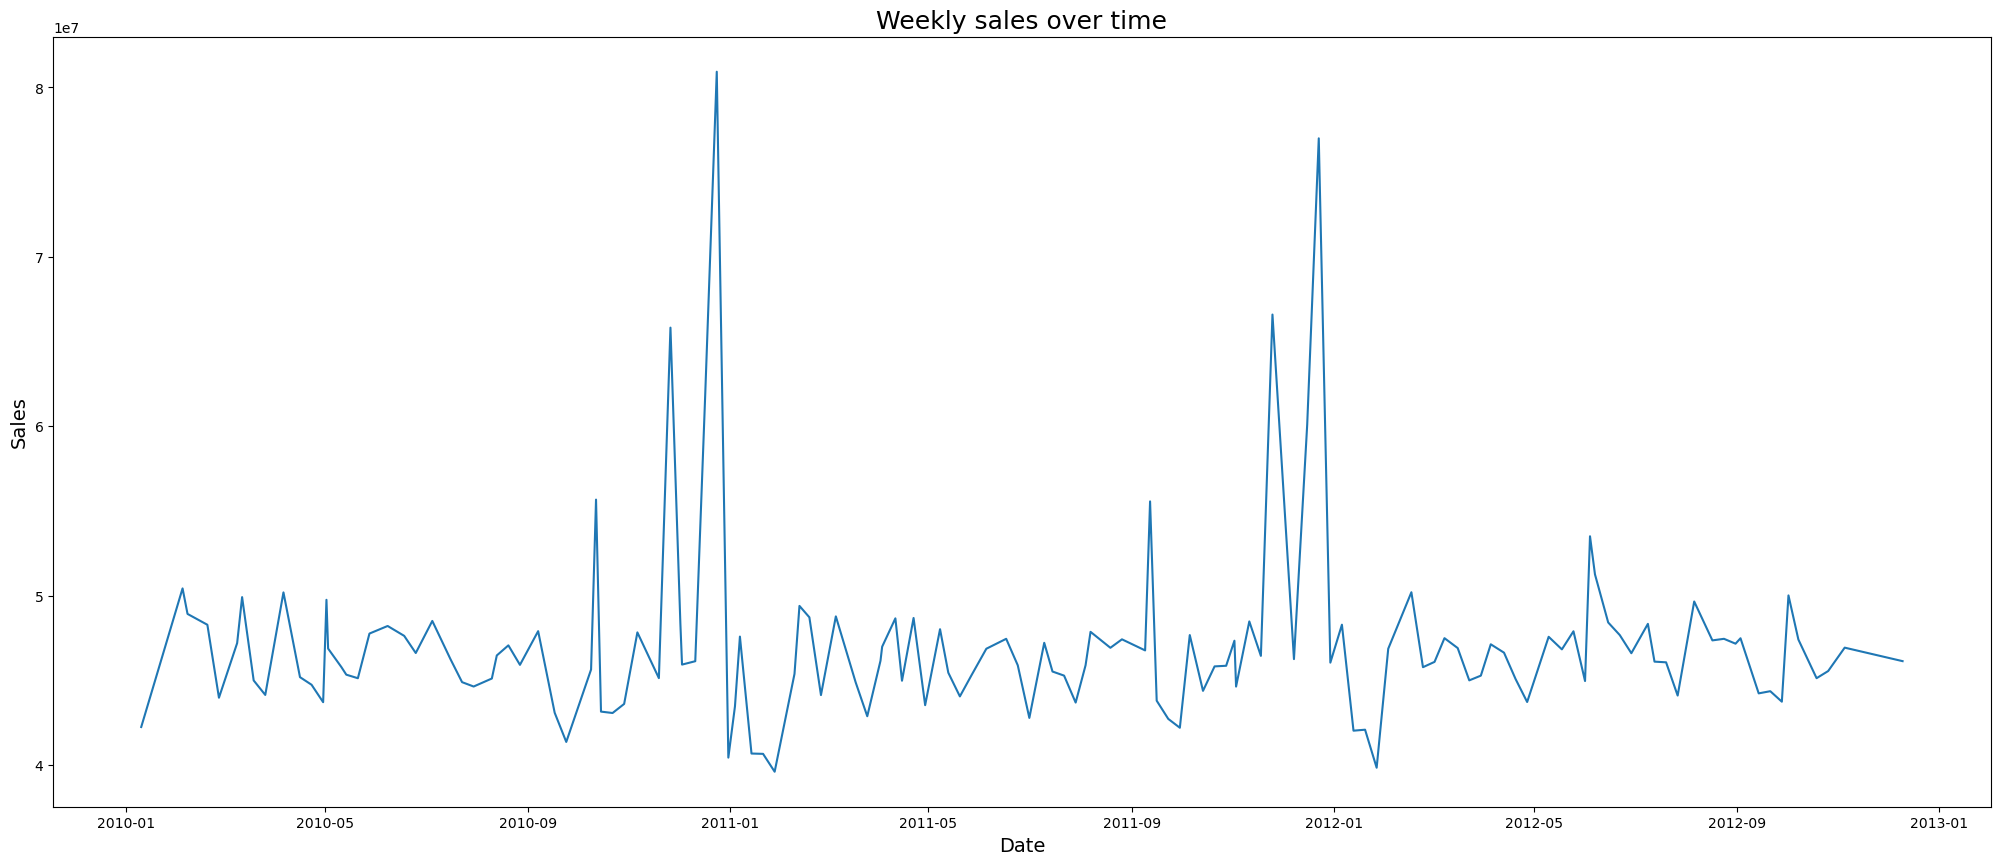

         Date  Weekly_Sales
46 2010-12-24     80.931416
98 2011-12-23     76.998241
95 2011-11-25     66.593605
41 2010-11-26     65.821003
45 2010-12-17     61.820800


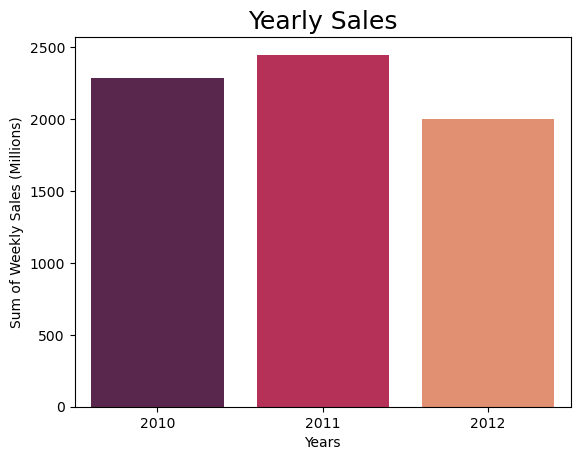

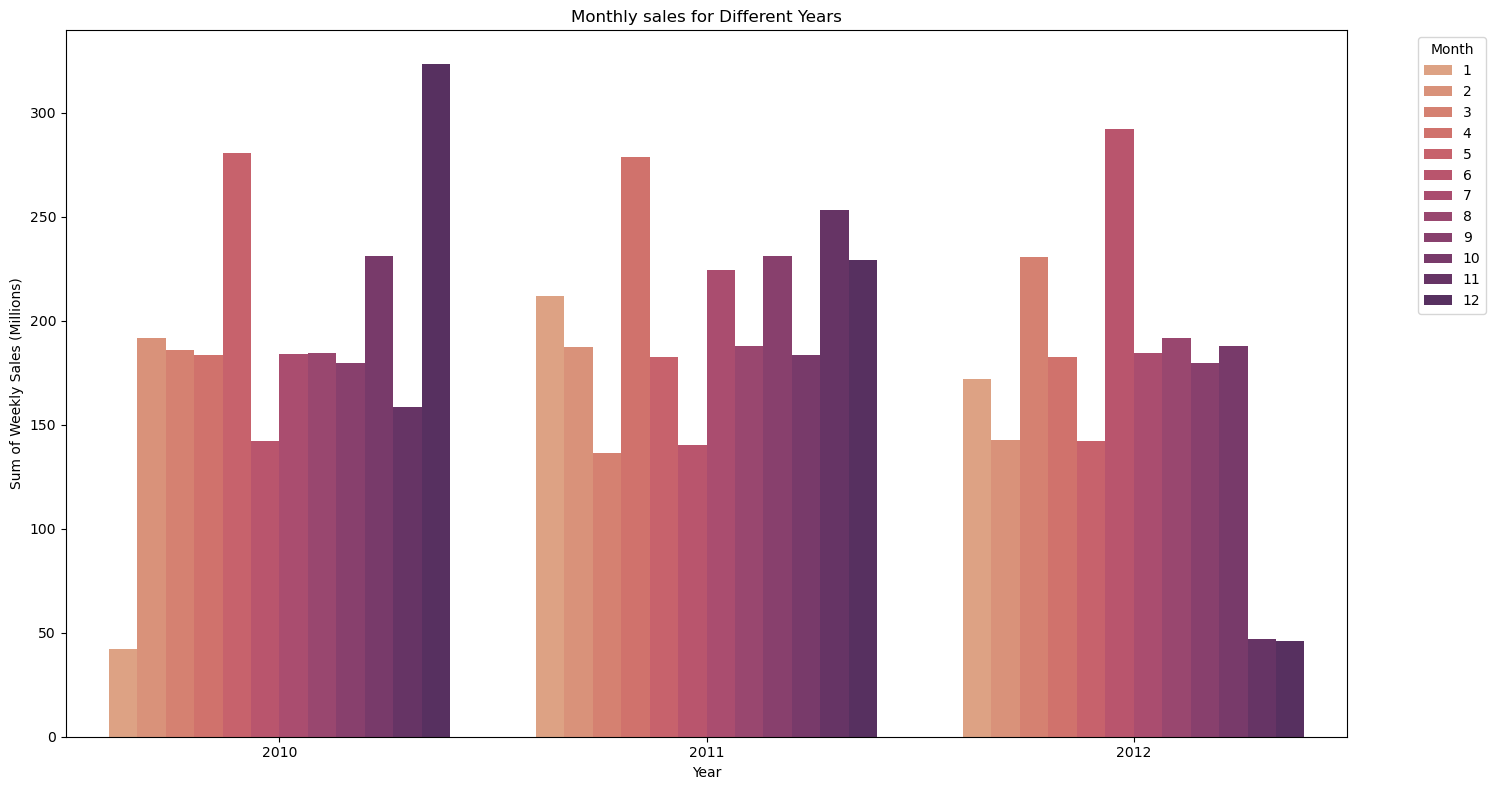

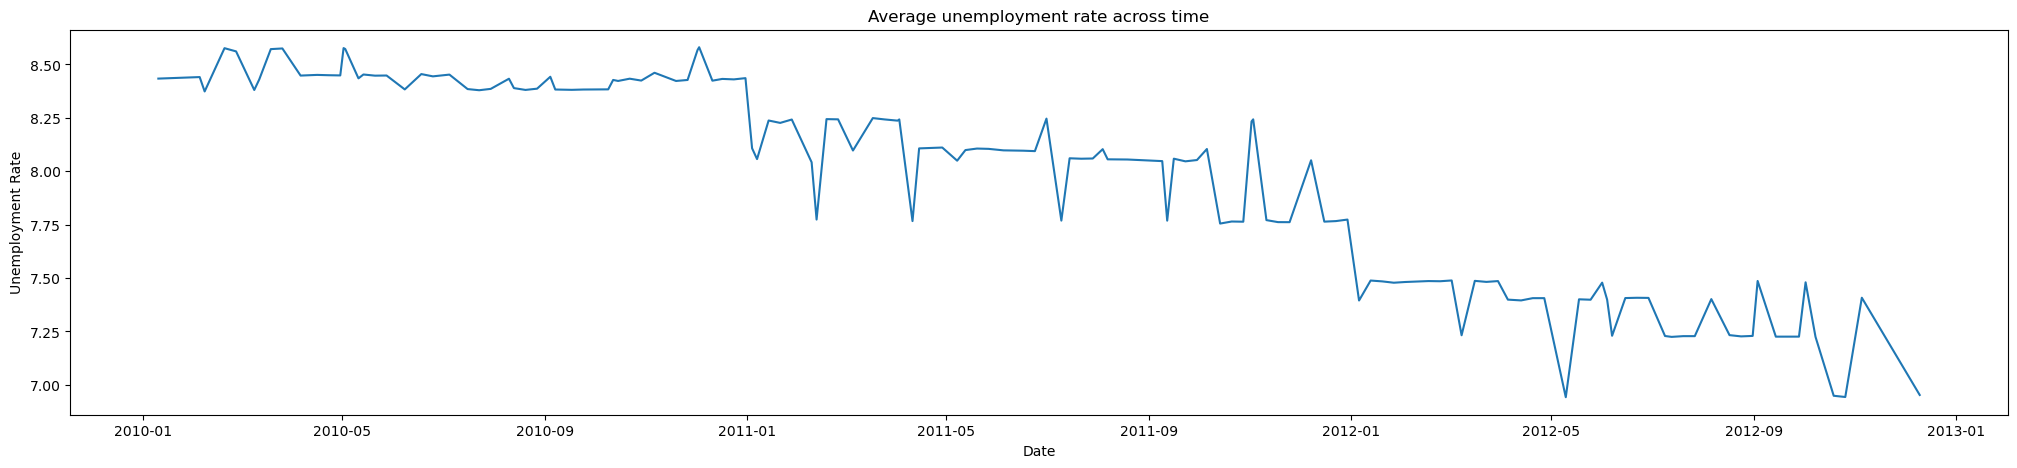

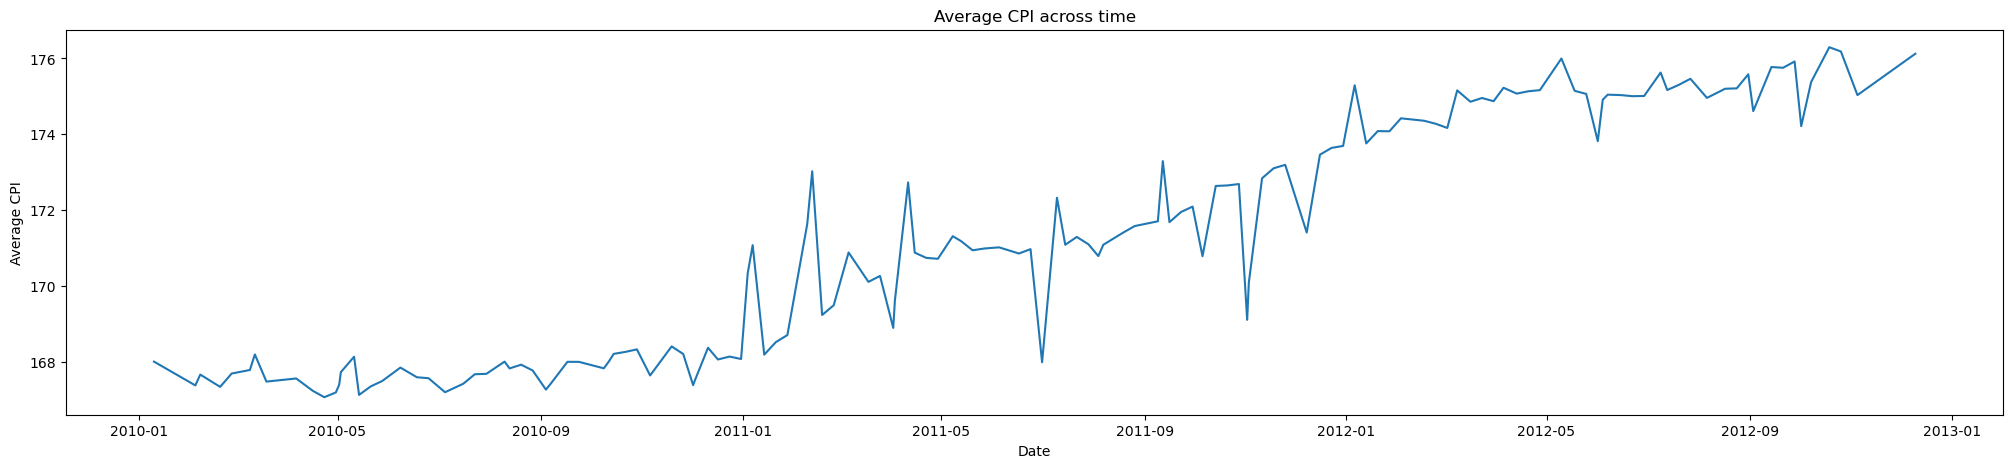

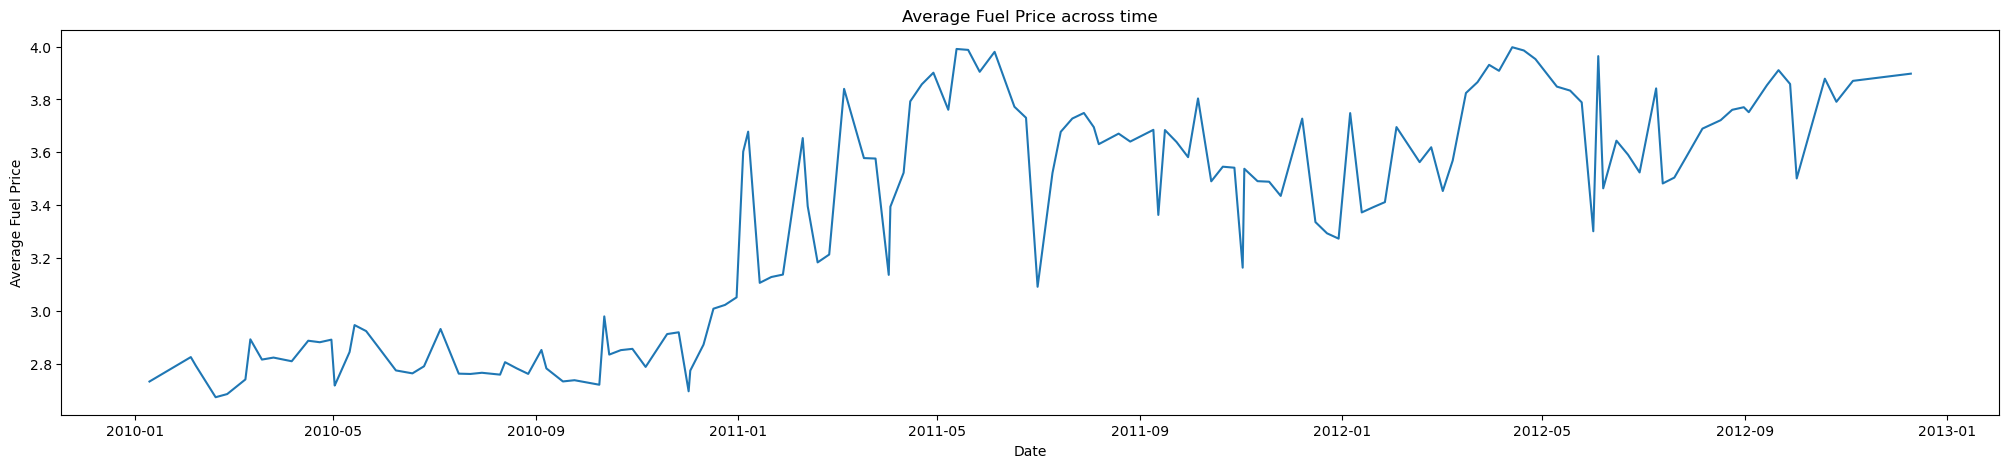

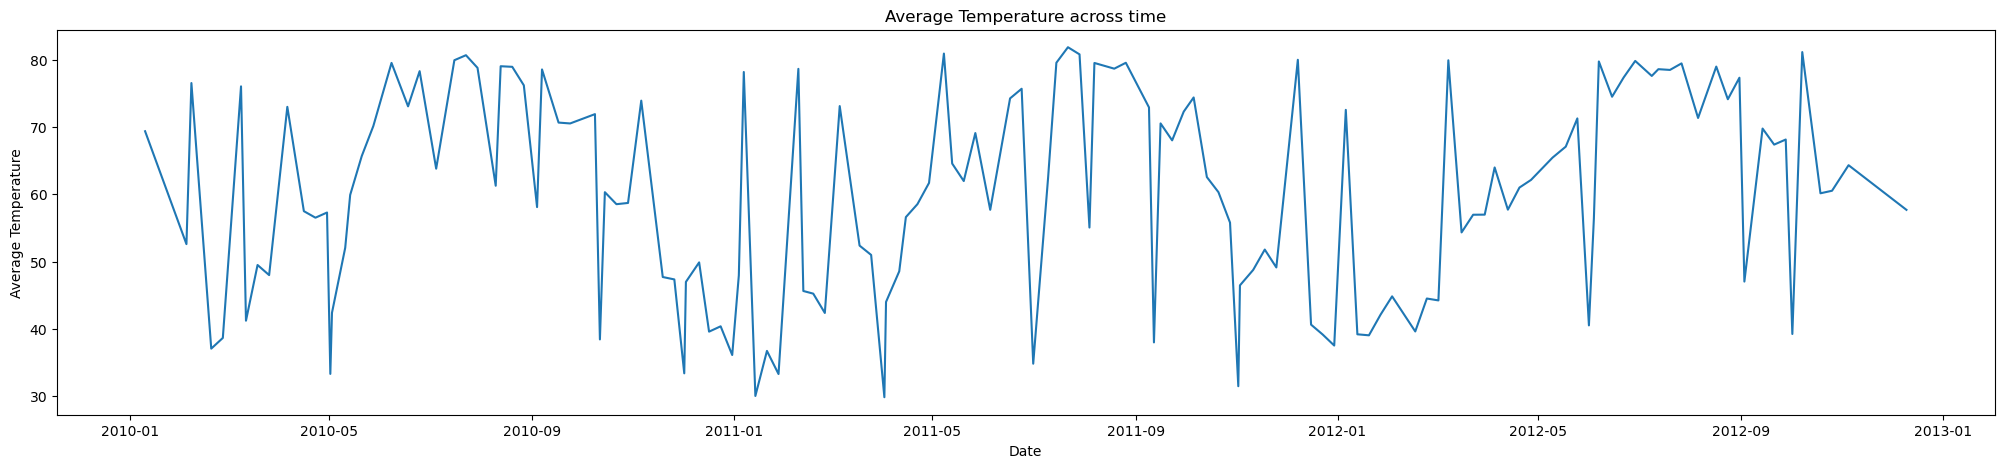

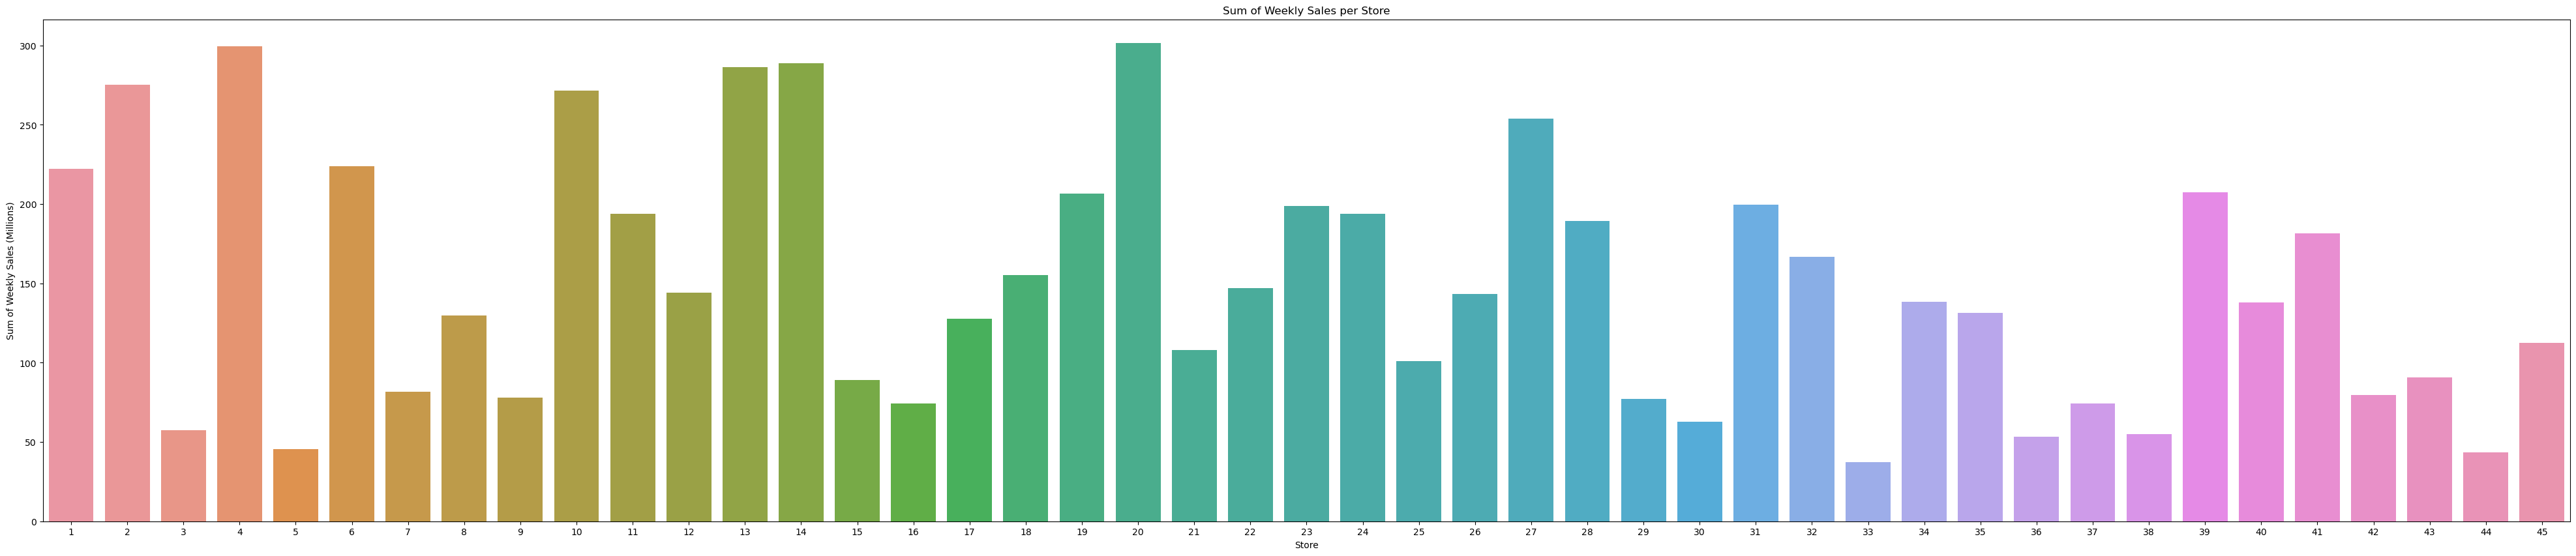

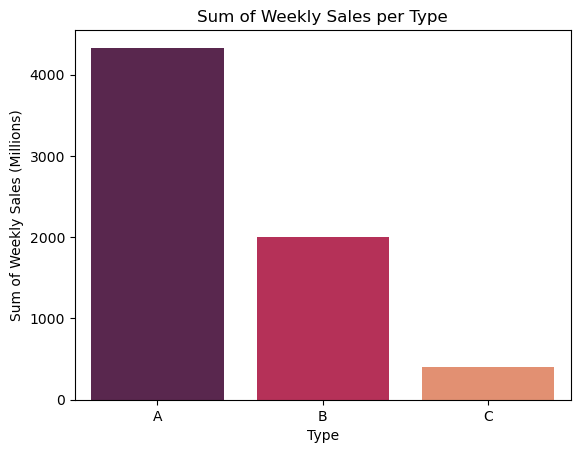

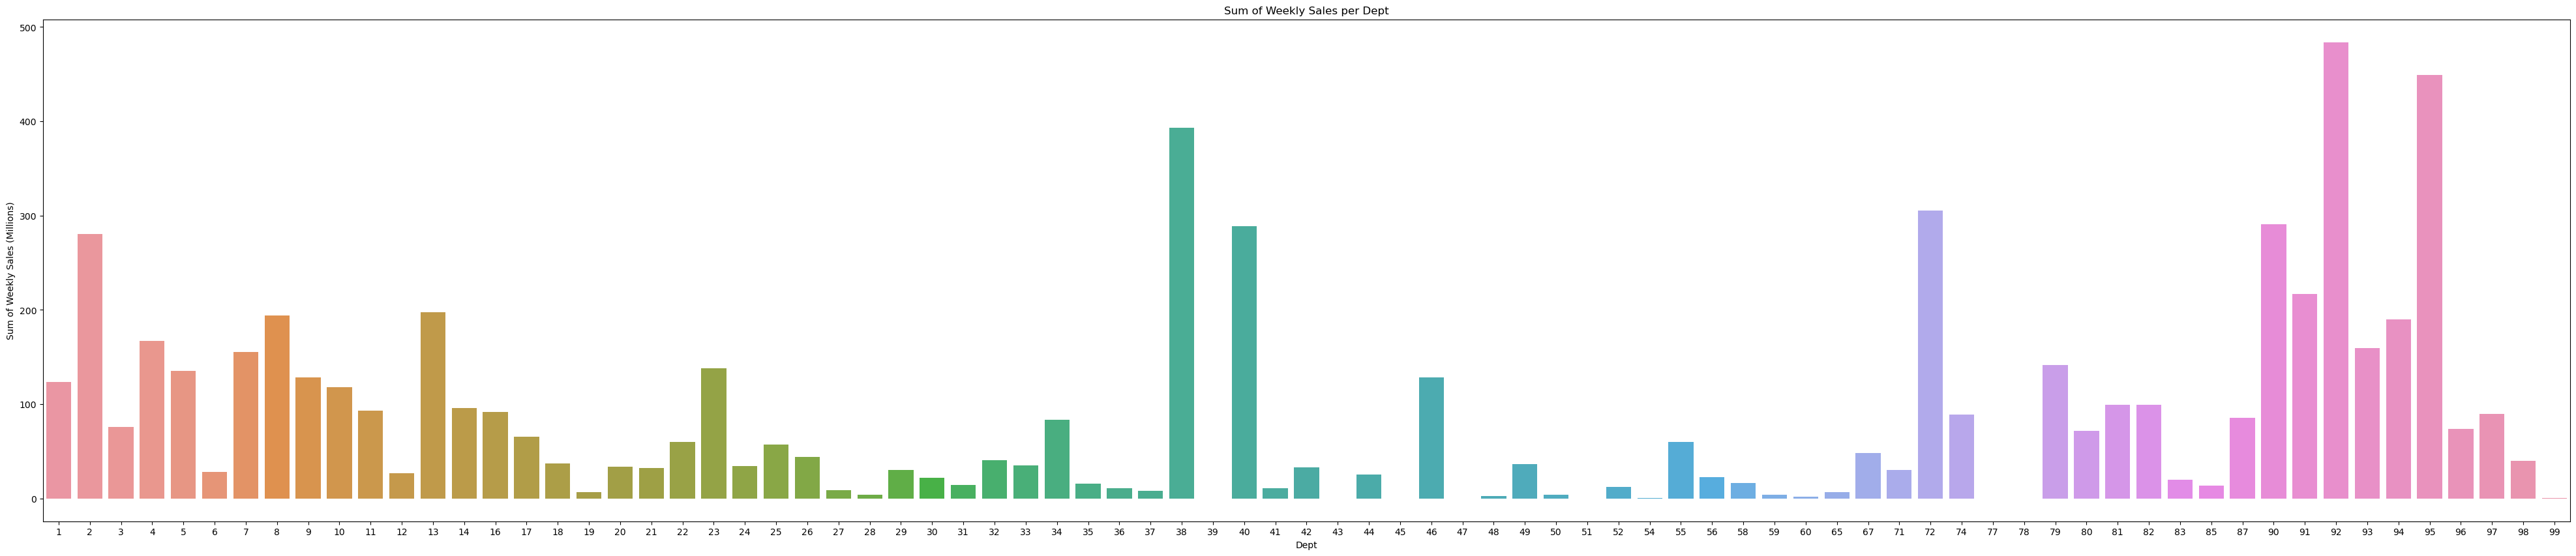

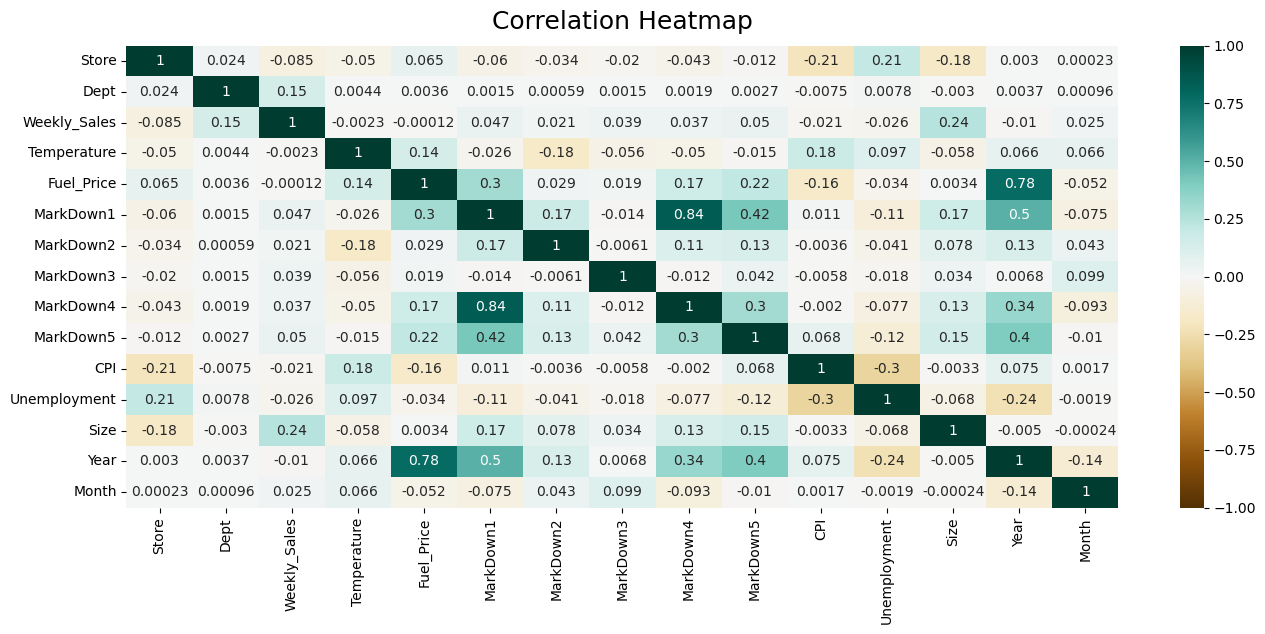

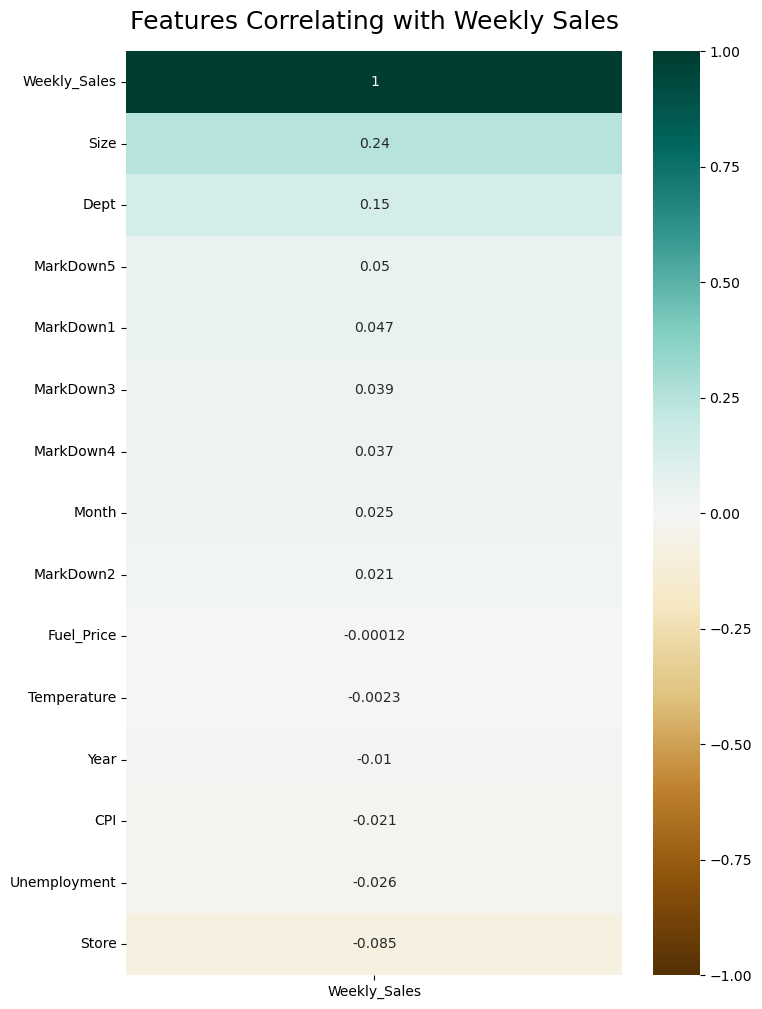

In [90]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

df_features = pd.read_csv("Features data set.csv")
df_sales = pd.read_csv("sales data-set.csv")
df_stores = pd.read_csv("stores data-set.csv")
df = pd.merge(df_sales, df_features, how = 'left', on = ['Store','Date','IsHoliday']) # merge df_sales and df_features by left since there are more rows for sales 
df_new = pd.merge(df, df_stores, how = 'left', on = 'Store') # merge df and df_stores by left to keep all the columns and rows
df_new['Date'] = pd.to_datetime(df_new['Date'], format = 'mixed')
df_new = df_new.fillna(0)

# Perform visualizations with the target of the weekly sales and how it relates to other features.

# sales  over time 
sales_over_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25, 10))
plt.plot(sales_over_time.Date, sales_over_time.Weekly_Sales)
plt.title("Weekly sales over time", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.show()

# Top 5 dates where weekly_sales are the highest (in millions)
sort_sales_over_time = (sales_over_time.sort_values('Weekly_Sales', ascending=False)
                        .assign(Weekly_Sales=lambda x: x['Weekly_Sales'] / 1000000))
print(sort_sales_over_time.head(5))

# Bar chart for Yearly sales
yearly_sales = df_new.groupby(df_new.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, data = df_new, palette = 'rocket')
plt.title("Yearly Sales", fontsize=18)
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")
plt.show()

# Prepare data for Monthly sales for different years
df_new['Year'] = df_new.Date.dt.year
df_new['Month'] = df_new.Date.dt.month

# Bar chart using seaborn for Monthly sales for different years
monthly_sales_melted = df_new.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales_melted.columns = ['Year', 'Month', 'Weekly_Sales']
monthly_sales_melted['Weekly_Sales'] = monthly_sales_melted['Weekly_Sales'] / 1000000

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Weekly_Sales', hue='Month', data=monthly_sales_melted, palette='flare')
plt.xlabel('Year')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Monthly sales for Different Years")
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Unemployment across time 
unn_across_time = df_new.groupby(df_new.Date, as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

# CPI across time 
cpi_across_time = df_new.groupby(df_new.Date, as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI)
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")

# Average fuel price across time 
fuel_across_time = df_new.groupby(df_new.Date, as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price)
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")

# Temperature  across time 
temp_across_time = df_new.groupby(df_new.Date, as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
# Average fuel price is generally increasing across the years 

# Sum of weekly sales across Stores 
stores_sales = df_new.groupby('Store', as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
plt.figure(figsize= (50,10))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales)
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

# Sum of weekly sales across Type  
type_sales = df_new.groupby('Type', as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

# Sum of weekly sales across Department   
dept_sales = df_new.groupby('Dept', as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales)
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

# Select only numeric columns for correlation
numeric_df = df_new.select_dtypes(include=[float, int])

# Correlation Matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

# Correlation of independent variables with the dependent variable (Weekly_Sales)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numeric_df.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Weekly Sales', fontdict={'fontsize': 18}, pad=16)
plt.show()

